## Step 1 Problem Statement

Develop a machine learning model to predict whether it will rain tomorrow (RainTomorrow) based on weather conditions such as temperature, humidity, wind speed, and other meteorological factors recorded in the dataset. The goal is to classify the RainTomorrow column into Yes (rain) or No (no rain) using historical data, including information on temperature, wind, pressure, and cloud cover.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

## Step 2 Data Gathering

In [4]:
df=pd.read_csv("weather.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Step 3 Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Date

In [7]:
df["Date"].value_counts()

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64

In [8]:
df["Date"].nunique()

3436

In [9]:
df["Date"].isna().sum()

0

In [10]:
df["Date"]=df["Date"].str.replace("-","")
df["Date"].inplace=True

In [11]:
df["Date"]

0         20081201
1         20081202
2         20081203
3         20081204
4         20081205
            ...   
145455    20170621
145456    20170622
145457    20170623
145458    20170624
145459    20170625
Name: Date, Length: 145460, dtype: object

In [12]:
df["Date"]=df["Date"].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  float64
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Location

In [14]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [15]:
df['Location'].isna().sum()

0

## MinTemp

In [16]:
df["MinTemp"].isna().sum()

1485

In [17]:
df['MinTemp'].fillna(df['MinTemp'].median() , inplace=True)

In [18]:
df["MinTemp"].isna().sum()

0

## MaxTemp

In [19]:
df["MaxTemp"].isna().sum()

1261

In [20]:
df['MaxTemp'].fillna(df['MaxTemp'].median() , inplace=True)

In [21]:
df["MaxTemp"].isna().sum()

0

## Rainfall

In [22]:
df["Rainfall"].isna().sum()

3261

In [23]:
df['Rainfall'].fillna(df['Rainfall'].median() , inplace=True)

In [24]:
df["Rainfall"].isna().sum()

0

## Evaporation

In [25]:
df["Evaporation"].isna().sum()

62790

In [26]:
df['Evaporation'].fillna(df['Evaporation'].median() , inplace=True)

In [27]:
df["Evaporation"].isna().sum()

0

## Sunshine

In [28]:
df["Sunshine"].isna().sum()

69835

In [29]:
df['Sunshine'].fillna(df['Sunshine'].median() , inplace=True)

In [30]:
df["Sunshine"].isna().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  float64
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [32]:
df['MinTemp']=df['MinTemp'].astype(float)

## WindGustDir

In [33]:
df["WindGustDir"].value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [34]:
df["WindGustDir"].isna().sum()

10326

In [35]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0] , inplace=True)

In [36]:
df["WindGustDir"].isna().sum()

0

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [38]:
df['WindGustDir']=label_encoder.fit_transform(df['WindGustDir'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  float64
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int32  
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## WindGustSpeed

In [40]:
df['WindGustSpeed'].isna().sum()

10263

In [41]:
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median() , inplace=True)

In [42]:
df['WindGustSpeed'].isna().sum()

0

## WindDir9am

In [43]:
df['WindDir9am'].value_counts()

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

In [44]:
df['WindDir9am'].isna().sum()

10566

In [45]:
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0] , inplace=True)

In [46]:
df['WindDir9am'].isna().sum()

0

In [47]:
df['WindDir9am']=label_encoder.fit_transform(df['WindDir9am'])

In [48]:
df['WindDir9am'].value_counts()

WindDir9am
3     22324
9      9287
0      9176
10     9112
7      8749
8      8659
13     8459
12     8423
5      8129
6      7980
1      7836
4      7671
2      7630
11     7587
14     7414
15     7024
Name: count, dtype: int64

## WindDir3pm

In [49]:
df['WindDir3pm'].value_counts()

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

In [50]:
df['WindDir3pm'].isna().sum()

4228

In [51]:
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0] , inplace=True)

In [52]:
df['WindDir3pm'].isna().sum()

0

In [53]:
df['WindDir3pm']=label_encoder.fit_transform(df['WindDir3pm'])

In [54]:
df['WindDir3pm'].value_counts()

WindDir3pm
9     15066
13    10110
8      9926
15     9518
10     9399
12     9354
3      8890
14     8874
7      8610
2      8505
0      8472
4      8263
11     8156
6      7870
1      7857
5      6590
Name: count, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  float64
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int32  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int32  
 10  WindDir3pm     145460 non-null  int32  
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## WindSpeed9am

In [56]:
df['WindSpeed9am'].isna().sum()

1767

In [57]:
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median() , inplace=True)

In [58]:
df['WindSpeed9am'].isna().sum()

0

## WindSpeed3pm

In [59]:
df['WindSpeed3pm'].isna().sum()

3062

In [60]:
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median() , inplace=True)

In [61]:
df['WindSpeed3pm'].isna().sum()

0

## Humidity9am

In [62]:
df['Humidity9am'].isna().sum()

2654

In [63]:
df['Humidity9am'].fillna(df['Humidity9am'].median() , inplace=True)

In [64]:
df['Humidity9am'].isna().sum()

0

## Humidity3pm

In [65]:
df['Humidity3pm'].isna().sum()

4507

In [66]:
df['Humidity3pm'].fillna(df['Humidity3pm'].median() , inplace=True)

In [67]:
df['Humidity3pm'].isna().sum()

0

## Pressure9am

In [68]:
df['Pressure9am'].isna().sum()

15065

In [69]:
df['Pressure9am'].fillna(df['Pressure9am'].median() , inplace=True)

In [70]:
df['Pressure9am'].isna().sum()

0

## Pressure3pm

In [71]:
df['Pressure3pm'].isna().sum()

15028

In [72]:
df['Pressure3pm'].fillna(df['Pressure3pm'].median(),inplace=True)

In [73]:
df['Pressure3pm'].isna().sum()

0

## Cloud9am

In [74]:
df['Cloud9am'].isna().sum()

55888

In [75]:
df['Cloud9am'].fillna(df['Cloud9am'].median(),inplace=True)

In [76]:
df['Cloud9am'].isna().sum()

0

## Cloud3pm

In [77]:
df['Cloud3pm'].isna().sum()

59358

In [78]:
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)

In [79]:
df['Cloud3pm'].isna().sum()

0

## Temp9am

In [80]:
df['Temp9am'].isna().sum()

1767

In [81]:
df['Temp9am'].fillna(df['Temp9am'].median(),inplace=True)

In [82]:
df['Temp9am'].isna().sum()

0

## Temp3pm

In [83]:
df['Temp3pm'].isna().sum()

3609

In [84]:
df['Temp3pm'].fillna(df['Temp3pm'].median(),inplace=True)

In [85]:
df['Temp3pm'].isna().sum()

0

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  float64
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int32  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int32  
 10  WindDir3pm     145460 non-null  int32  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

## RainToday

In [87]:
df['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [88]:
df['RainToday'].isna().sum()

3261

In [89]:
df['RainToday'].fillna(df['RainToday'].mode()[0],inplace=True)

In [90]:
df['RainToday'].isna().sum()

0

In [91]:
df['RainToday'].replace({'Yes':1,'No':0},inplace=True)

In [92]:
df['RainToday'].value_counts()

RainToday
0    113580
1     31880
Name: count, dtype: int64

## RainTomorrow

In [93]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [94]:
df['RainTomorrow'].isna().sum()

3267

In [95]:
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0],inplace=True)

In [96]:
df['RainTomorrow'].isna().sum()

0

In [97]:
df['RainTomorrow'].replace({'Yes':1,'No':0},inplace=True)

In [98]:
df['RainTomorrow'].value_counts()

RainTomorrow
0    113583
1     31877
Name: count, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  float64
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int32  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int32  
 10  WindDir3pm     145460 non-null  int32  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

# Step 4 Feature Selection

In [100]:
df.drop(['Date','Location'],axis=1,inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustDir    145460 non-null  int32  
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  int32  
 8   WindDir3pm     145460 non-null  int32  
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Cloud9am       145460 non-null  float64
 16  Cloud3pm       145460 non-null  float64
 17  Temp9am        145460 non-nul

# Step 5 Model Training

In [102]:
x=df.drop('RainTomorrow',axis=1)
y=df[['RainTomorrow']]

In [103]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,4.8,8.4,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0
145456,3.6,25.3,0.0,4.8,8.4,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0
145457,5.4,26.9,0.0,4.8,8.4,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0
145458,7.8,27.0,0.0,4.8,8.4,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0


In [104]:
y

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
145455,0
145456,0
145457,0
145458,0


## Train Test Split

In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [107]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
96775,8.5,23.1,0.0,0.6,9.0,6,43.0,5,6,15.0,26.0,45.0,23.0,1012.3,1007.8,5.0,5.0,17.5,22.6,0
96840,17.9,22.1,0.0,10.2,11.5,11,46.0,11,12,17.0,24.0,64.0,40.0,1017.9,1019.8,5.0,5.0,18.6,21.6,0
66795,11.1,17.5,0.4,4.2,1.0,14,52.0,7,15,28.0,28.0,55.0,47.0,1017.2,1017.6,7.0,7.0,14.7,16.6,0
104598,3.6,22.1,0.0,7.2,11.3,8,41.0,9,12,17.0,19.0,54.0,32.0,1022.8,1019.6,4.0,4.0,13.3,21.3,0
137064,7.3,23.6,0.0,11.8,10.5,10,41.0,9,9,28.0,20.0,16.0,14.0,1021.4,1017.6,5.0,8.0,18.6,23.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,14.4,24.8,0.0,6.2,12.6,13,39.0,7,4,15.0,22.0,61.0,56.0,1022.7,1020.4,1.0,1.0,21.9,24.2,0
105595,26.7,43.7,0.0,16.0,12.4,9,44.0,9,12,24.0,7.0,37.0,12.0,1008.2,1005.0,1.0,1.0,30.1,41.4,0
93553,17.7,28.6,0.0,6.6,8.3,1,31.0,11,4,9.0,20.0,71.0,57.0,1016.9,1014.1,7.0,1.0,24.5,27.1,0
94735,25.6,34.2,11.4,4.0,5.5,15,46.0,13,13,19.0,15.0,65.0,47.0,998.3,995.4,7.0,7.0,28.7,33.5,1


In [108]:
x_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
124601,16.5,27.1,0.8,4.8,8.4,1,26.0,0,1,13.0,7.0,79.0,48.0,1017.6,1015.2,5.0,5.0,19.6,25.7,0
19713,10.8,15.7,0.0,4.8,8.4,11,48.0,12,8,20.0,37.0,41.0,47.0,1018.7,1019.7,5.0,5.0,13.2,15.3,0
98025,14.2,23.3,0.0,1.8,5.3,4,35.0,4,3,15.0,15.0,57.0,44.0,1018.7,1015.8,5.0,5.0,18.4,22.9,0
58336,1.7,9.9,0.0,0.8,8.4,4,37.0,1,4,17.0,20.0,88.0,81.0,1013.8,1009.5,7.0,8.0,5.5,8.5,0
116285,8.1,21.4,11.2,4.8,11.9,0,41.0,0,10,24.0,9.0,48.0,33.0,1024.4,1021.2,0.0,0.0,14.5,20.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65552,4.4,22.8,0.0,4.6,9.9,3,59.0,3,3,37.0,33.0,42.0,26.0,1024.3,1021.3,7.0,7.0,14.4,20.5,0
59794,4.6,17.5,3.0,1.1,8.4,8,31.0,5,15,2.0,20.0,89.0,49.0,1026.0,1024.1,5.0,5.0,11.5,17.2,1
4308,6.4,17.6,0.0,4.8,8.4,10,37.0,12,11,19.0,13.0,76.0,91.0,1030.3,1028.3,5.0,5.0,11.9,12.5,0
101795,7.4,14.9,0.6,0.6,4.7,13,52.0,6,14,22.0,20.0,96.0,72.0,1019.0,1016.0,8.0,7.0,10.0,13.7,0


In [109]:
y_train

,RainTomorrow
96775,0
96840,0
66795,0
104598,0
137064,0
...,...
9372,0
105595,0
93553,0
94735,0


In [110]:
y_test

,RainTomorrow
124601,0
19713,0
98025,1
58336,0
116285,0
...,...
65552,0
59794,0
4308,1
101795,1


In [111]:
y_test.value_counts()

RainTomorrow
0               22739
1                6353
Name: count, dtype: int64

## Create an instance

## 1) Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score 

In [111]:
log_model = LogisticRegression()

In [112]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [113]:
log_model.fit(x_test,y_test)

LogisticRegression()

In [114]:
# Training data evaluation

ypredtrain = log_model.predict(x_train)

Accuracy = accuracy_score(y_train,ypredtrain)
print('Accuracy: ',Accuracy)

Confusion_matrix = confusion_matrix(y_train,ypredtrain)
print('Confusion_matrix : \n',Confusion_matrix)

Classification_report = classification_report(y_train,ypredtrain)
print('Classification_report : \n',Classification_report)

Accuracy:  0.8391052523030387
Confusion_matrix : 
 [[86239  4605]
 [14118 11406]]
Classification_report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     90844
           1       0.71      0.45      0.55     25524

    accuracy                           0.84    116368
   macro avg       0.79      0.70      0.73    116368
weighted avg       0.83      0.84      0.82    116368



In [115]:
# Testing data evaluation

ypredtest = log_model.predict(x_test)

acc_lr = accuracy_score(y_test,ypredtest)
print('Accuracy: ',acc_lr)

Confusion_matrix = confusion_matrix(y_test,ypredtest)
print('Confusion_matrix : \n',Confusion_matrix)

Classification_report = classification_report(y_test,ypredtest)
print('Classification_report : \n',Classification_report)

Accuracy:  0.8392685274302214
Confusion_matrix : 
 [[21576  1163]
 [ 3513  2840]]
Classification_report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22739
           1       0.71      0.45      0.55      6353

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.73     29092
weighted avg       0.83      0.84      0.82     29092



In [116]:
y_pred_prob= log_model.predict_proba(x_test)
y_pred_prob

array([[0.90613209, 0.09386791],
       [0.94047238, 0.05952762],
       [0.88445401, 0.11554599],
       ...,
       [0.58449244, 0.41550756],
       [0.35316432, 0.64683568],
       [0.93700379, 0.06299621]])

In [117]:
fpr , tpr, thresh = roc_curve(y_test, y_pred_prob[:,1])

In [118]:
tpr

array([0.00000000e+00, 1.57405950e-04, 2.83330710e-03, ...,
       9.99842594e-01, 1.00000000e+00, 1.00000000e+00])

In [119]:
fpr

array([0.        , 0.        , 0.        , ..., 0.98860988, 0.98860988,
       1.        ])

Text(0, 0.5, 'True Positive Rate')

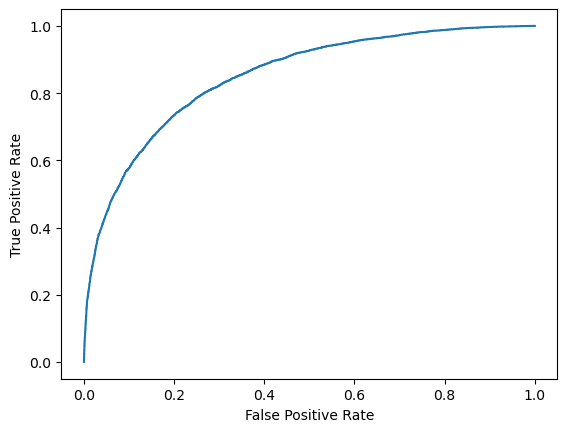

In [120]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## 2) K-Nearest Neighbour (KNN)

In [121]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 

In [122]:
Knn_model = KNeighborsClassifier()
Knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [123]:
## Testing Data Evualation
y_pred = Knn_model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is:\n', cf_matrix)

acc= accuracy_score(y_test, y_pred)
print('\nAccuracy is:',acc)

clf_Report = classification_report(y_test, y_pred)
print('\nClassification Report is:\n',clf_Report)


Confusion Matrix is:
 [[21266  1473]
 [ 3172  3181]]

Accuracy is: 0.8403341124707824

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     22739
           1       0.68      0.50      0.58      6353

    accuracy                           0.84     29092
   macro avg       0.78      0.72      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [124]:
## Training Data Evaluation
y_pred_train = Knn_model.predict(x_train)
cf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is:\n', cf_matrix)

acc= accuracy_score(y_train,y_pred_train)
print('\nAccuracy is:',acc)

clf_Report = classification_report(y_train,y_pred_train)
print('\nClassification Report is:\n',clf_Report)


Confusion Matrix is:
 [[86954  3890]
 [10255 15269]]

Accuracy is: 0.8784459645263303

Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     90844
           1       0.80      0.60      0.68     25524

    accuracy                           0.88    116368
   macro avg       0.85      0.78      0.80    116368
weighted avg       0.87      0.88      0.87    116368



## Hyperparameter Tunning

In [125]:
knn_model = KNeighborsClassifier()
hyp = {'p':[1,2],'n_neighbors' : np.arange(3,30)} 
gscv_knn_model = GridSearchCV(knn_model, hyp, cv=5) # cv= cross validation
gscv_knn_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [126]:
gscv_knn_model.best_params_

{'n_neighbors': 27, 'p': 1}

In [127]:
# Testing accuracy after Hyperparameter tunning
y_pred_new = gscv_knn_model.predict(x_test)

acc_knn= accuracy_score(y_test,y_pred_new)
print('Accuracy:', acc)

Accuracy: 0.8784459645263303


In [128]:
# Training accuracy after Hyperparameter tunning
y_pred_new = gscv_knn_model.predict(x_train)

acc= accuracy_score(y_train,y_pred_new)
print('Accuracy:', acc)

Accuracy: 0.8560600852468032


## 3) Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [130]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [131]:
## Testing Data
y_pred_test = dt_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score = accuracy_score(y_test,y_pred_test)
print('\nAccuracy Score :\n', acc_score)

clf_report = classification_report(y_test,y_pred_test)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[19441  3298]
 [ 3045  3308]]

Accuracy Score :
 0.7819675512168294

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     22739
           1       0.50      0.52      0.51      6353

    accuracy                           0.78     29092
   macro avg       0.68      0.69      0.69     29092
weighted avg       0.79      0.78      0.78     29092



In [132]:
## Training Data
y_pred_train = dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc_score)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[90844     0]
 [   10 25514]]

Accuracy Score :
 0.9999140657225354

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     90844
           1       1.00      1.00      1.00     25524

    accuracy                           1.00    116368
   macro avg       1.00      1.00      1.00    116368
weighted avg       1.00      1.00      1.00    116368



## Plot Decision Tree

plt.figure(figsize=(100,100))
tree = plot_tree(dt_model, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('Decision_Tree_clf.png')

## Hyperparameter Tunning

In [133]:
dt_model = DecisionTreeClassifier()

hyp= {'criterion' : ['gini','entropy'],
'max_depth': np.arange(1,15),
'min_samples_leaf':np.arange(2,10), 
'min_samples_split':np.arange(2,20)}

gscv_dt_model = GridSearchCV(dt_model, hyp, cv=7)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [134]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=19)

In [135]:
## Training Data after hyper parameter tunning
y_pred_train = gscv_dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[85671  5173]
 [12713 12811]]

Accuracy Score :
 0.8462979513268253

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91     90844
           1       0.71      0.50      0.59     25524

    accuracy                           0.85    116368
   macro avg       0.79      0.72      0.75    116368
weighted avg       0.84      0.85      0.84    116368



In [137]:
## Testing Data after hyper parameter tunning
y_pred_test = gscv_dt_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_dt = accuracy_score(y_test,y_pred_test)
print('\nAccuracy Score :\n', acc_dt)

clf_report = classification_report(y_test,y_pred_test)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[21342  1397]
 [ 3249  3104]]

Accuracy Score :
 0.8402997387597965

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     22739
           1       0.69      0.49      0.57      6353

    accuracy                           0.84     29092
   macro avg       0.78      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



## 4) Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
# Model Training with RF
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [140]:
y_pred_rf = rf_model.predict(x_train)
rf_acc = accuracy_score(y_train, y_pred_rf)

## Hyperparameter Tunning

In [141]:
rf_model = RandomForestClassifier()
hyp = {'criterion': ['gini','entropy'],
 'n_estimators': np.arange(10,200,10),
 'max_depth': np.arange(2,10),
 'min_samples_split': np.arange(2,20),
 'min_samples_leaf': np.arange(2,10)}
rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=7)
rscv_rf_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [142]:
rscv_rf_clf.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=8)

In [143]:
rf_model = RandomForestClassifier(max_depth=8,
 min_samples_leaf=2,
min_samples_split=8,
 n_estimators=80,
max_features=10,# log2(no. of features)
 oob_score = True)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=80, oob_score=True)

In [144]:
# Train data Accuracy
y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix: ',cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print('\nAccuracy score is', acc)


Confusion Matrix:  [[87480  3364]
 [13611 11913]]

Accuracy score is 0.8541265640038499


In [146]:
# Test data Accuracy
y_pred_test = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('\nConfusion Matrix: ',cnf_matrix)

acc_rf = accuracy_score(y_test,y_pred_test)
print('\nAccuracy score is', acc_rf)


Confusion Matrix:  [[21837   902]
 [ 3455  2898]]

Accuracy score is 0.8502337412347037


In [147]:
rf_model.oob_score_

0.8462635776158394

## 5) AdaBoost

In [112]:
from sklearn.ensemble import AdaBoostClassifier

In [113]:
ada_boost = AdaBoostClassifier(n_estimators=1,random_state=1)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=1, random_state=1)

In [117]:
# Training data evaluation

y_pred_train = ada_boost.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix is\n', cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print('Accuracy is', acc)

clf_report= classification_report(y_train,y_pred_train)
print('Classification report', clf_report)

Confusion Matrix is
 [[83291  7553]
 [13892 11632]]
Accuracy is 0.8157139419771758
Classification report               precision    recall  f1-score   support

           0       0.86      0.92      0.89     90844
           1       0.61      0.46      0.52     25524

    accuracy                           0.82    116368
   macro avg       0.73      0.69      0.70    116368
weighted avg       0.80      0.82      0.81    116368



In [118]:
# Testing data evaluation

y_pred_test = ada_boost.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix is\n', cnf_matrix)

acc_ab = accuracy_score(y_test,y_pred_test)
print('Accuracy is', acc_ab)

clf_report= classification_report(y_test,y_pred_test)
print('Classification report', clf_report)

Confusion Matrix is
 [[20857  1882]
 [ 3454  2899]]
Accuracy is 0.8165818781795683
Classification report               precision    recall  f1-score   support

           0       0.86      0.92      0.89     22739
           1       0.61      0.46      0.52      6353

    accuracy                           0.82     29092
   macro avg       0.73      0.69      0.70     29092
weighted avg       0.80      0.82      0.81     29092



In [119]:
ada_boost.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.])

In [120]:
s1 = pd.Series(ada_boost.feature_importances_, index=x_train.columns)
s1

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      1.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

<Axes: >

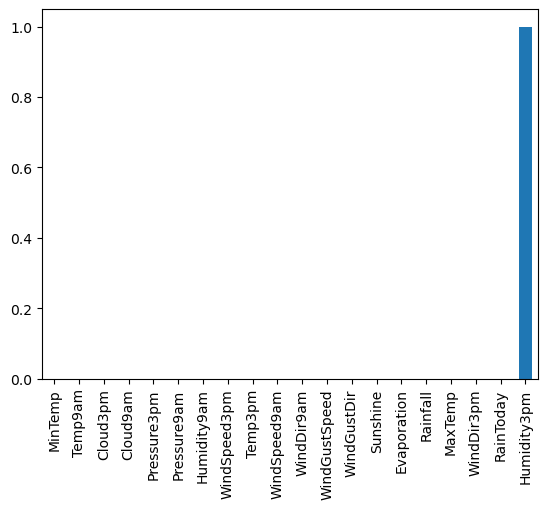

In [121]:
s1 = pd.Series(ada_boost.feature_importances_, index=x_train.columns)
s1.sort_values().plot(kind ='bar')

## Comparing the accuracies

In [125]:
# Model Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost'],
    'Score' : [100*round(acc_lr,4), 100*round(acc_knn,4), 100*round(acc_dt,4), 100*round(acc_rf,4), 100*round(acc_ab,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,87.84
3,Random Forest Classifier,85.02
2,Decision Tree Classifier,84.03
0,Logistic Regression,83.93
4,AdaBoost,81.66


## Conclusion

So according to the above Acuuracies found we can use **K-Nearest Neighbour(KNN)** for the better accuracy